# Implementation from Scratch

<br />

I am going to implement algorithms by using the least kinds of libraries such as Numpy possible.


Decision tree can be used as both classification and regression. However, I will only implement classification one this time.

## [Task 1] Create a Definition to Compute Gini Impurity

<br />

I create a definition to compute Gini impurity that is an index value to split space.

Gini impurity $I(t)$ against node $t$ can be computed by the following equation.

$$
I(t) = 1-\sum_{i=1}^{K}P^2(C_i|t) = 1-\sum_{i=1}^{K}(\frac{N_{t,i}}{N_{t,all}})^{2}
$$

$t$: index of a node

$i$: index of a class

$K$: the number of classes

$C_i$: ith class

$P(C_i|t)$: ratio of $C_i$ in terms of $t$th node

$N_{t,i}$: the number of samples coming into $i$th class in terms of $t$th node

$N_{t,all}$: total number of samples in terms of $t$th node

## [Task 2] Create a Definition to Compute Information Gain

<br />

I am going to create a definition to compute information gains. When using the definition, I import the definition to compute Gini impurity. 

$$
IG(p) = I(p)-\frac{N_{left,all}}{N_{p,all}}I(left)-\frac{N_{right,all}}{N_{p,all}}I(right)
$$

$p$: index of a parent node

$left$: index of a node located on the left side of the decition tree

$right$: index of a node located on the right side of the decition tree

## [Task 3] Create a Class of Decision Tree Classifier whose depth is 1.

<br />

I am going to create a class of decision tree classifier whose depth is 1.

<br />

#### <u>Algorithms of Decision Tree</u>


- I will focus on any feature, think of all the patterns of thresholds and compute each information gain. The method of letting each value a threshold is general. Indeed, the number of thresholds is one less than the number of samples. Then, I will choose the most biggest information gain among all kinds of the splits as the method of splitting the node.


- A node whose gini impurity is 0, or a node whose depth is designated is named leaf. I am going to record what class the leaf is classified when the prediction. In a case that gini impurity is not 0, I will decide a class to classify the node by majority vote.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [110]:
# Create a class of decision tree from scratch

class ScratchDecisionTreeClassifier():
    """
    Implement decision tree from scratch.
    
    Attributes
    ----------
    self.threshold: float
        thresholds
    
    self.left_label: int
        label of a left tree
    
    self.right_label: int
        label of a right tree
    """
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Fit datasets by decision tree.
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Features of train dataset
        
        y: ndarray whose shape is (n_samples,)
            Correct values of train dataset
        
        X_val: ndarray whose shape is (n_samples,n_features)
            Features of validation dataset
        
        y_val: ndarray whose shape is (n_samples,)
            Correct values of validation dataset
        """
        
        # Transform arrays to move their features to rows
        X = X.T
        if (X_val is not None) and (y_val is not None):
            X_val = X_val.T
        
        # Decide a threshold
        self.threshold = self._best_threshold(X, y)
#         print("self.threshold",self.threshold)
    
    
    def predict(self, X):
        """
        Prediction
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Samples
        
        
        Returns
        ----------
        ndarray whose shape is (n_samples,1)
            Results of the prediction
        """
        
        # Transform arrays to move their features to rows
        X = X.T
        
#         print("self.threshold",self.threshold)
        
        # Label
        y_pred = []
        for x in X[1]:
            if x >= self.threshold:
                y_pred.append(self.left_label)
            else:
                y_pred.append(self.right_label)
        
        # Return the prediction
        return y_pred
    
    
    # Create a definition to compute a Gini impurity
    def _gini_impurity(self, m, n):
        """
        Compute Gini impurities.
        
        Parameters
        ----------
        m: int
            The number of samples
        
        n: int
            The number of samples whose class is different with the class that the number of samples is m
        
        Returns
        ----------
        float
            Gini impurity
        """
        
        # Compute a Gini impurity
        return 1-((m/(m+n))**2 + (n/(m+n))**2)
    
    
    def _information_gain(self, m, n, s, t):
        """
        Compute Gini impurities.
        
        Parameters
        ----------
        m: int
            The number of samples on left side
        
        n: int
            The number of samples on left side whose class is different with the class that the number of samples is m
        
        s: int
            The number of samples on right side
        
        t: int
            The number of samples on right side whose class is different with the class that the number of samples is s
        
        Returns
        ----------
        float
            Information gain
        """
        
        # Compute Gini impurities
        left_gini_impurity = self._gini_impurity(m, n)
        right_gini_impurity = self._gini_impurity(s, t)
        
        # Returns an information gain
        return self._gini_impurity(m+n, s+t) - (m+n)/(m+n+s+t)*left_gini_impurity - (s+t)/(m+n+s+t)*right_gini_impurity
    
    
    # Choose the best threshold
    def _best_threshold(self, X, y):
        # Set a temporary information gain
        info_gain = 0
        
        # Change y to a list
        y = y.tolist()
#         print("y",y)
        
        # Loop of features
        for f in range(X.shape[0]):
            # Delete duplicate values
            non_duplicates_array = np.unique(X[f,:])
            
            # Delete the minimum value of the arrays not containing duplicate values
            non_dupli = np.delete(non_duplicates_array, non_duplicates_array.min())
#             print(non_dupli.shape)
            
            # Loop of samples
            for s in range(len(non_dupli)):
                # Update the threshold
                temporary_threshold = non_dupli[s]
#                 print("temporary_threshold",temporary_threshold)
                
                # Change values of y to only 2 kinds of values, 0 and 1
                y = [1 if i == max(y) else 0 for i in y]
#                 print("y",y)
                
                # Get indices of the objective variable
                index_true_list = [i for i, x in enumerate(y) if x == 1]
                index_false_list = [i for i, x in enumerate(y) if x == 0]
#                 print("index_true",index_true)
                
                # Change the lists to arrays
                index_true = np.array(index_true_list)
                index_false = np.array(index_false_list)

                # Count samples whose objective variable is TRUE/FALSE
                n_more_true = np.sum(X[f,index_true] >= temporary_threshold)
                n_more_false = np.sum(X[f,index_false] >= temporary_threshold)
                n_less_true = np.sum(X[f,index_true] < temporary_threshold)
                n_less_false = np.sum(X[f,index_false] < temporary_threshold)
#                 print("n_more_true",n_more_true)

                # Update the information gain and the threshold
                if self._information_gain(n_more_true, n_more_false, n_less_true, n_less_false) > info_gain:
                    info_gain = self._information_gain(n_more_true, n_more_false, n_less_true, n_less_false)
#                     print("info_gain",info_gain)
                    self.threshold = temporary_threshold
#                     print("self.threshold",self.threshold)
        
        # Label
        if n_more_true >= n_more_false:
            left_label = 1
        else:
            left_label = 0

        if n_less_true >= n_less_false:
            right_label = 1
        else:
            right_label = 0
        
        if left_label == right_label:
            self.left_label = 1
            self.right_label = 0
        else:
            self.left_label = left_label
            self.right_label = right_label
    
        return self.threshold
    
    
    # Compute index values
    def compute_index_values(self, X, y):
        """
        Compute Index values.
        
        Parameters
        ----------
        X: ndarray, shape(n_samples,n_features)
            Features of train dataset
        
        y: ndarray, shape(n_samples,)
            Correct values of train dataset
        """
        
        y_pred = self.predict(X)
#         print("compute_index_values-1, y_pred=", y_pred)
#         print("compute_index_values-3, y_pred=", len(y_pred))   # 20
        
        # Change values of y to only 2 kinds of values, 0 and 1
        y = [1 if i == max(y) else 0 for i in y]
#         print("compute_index_values-2, y=", y)
#         print("compute_index_values-4, y=", len(y))   # 20
        
        # Return index values
        print("accuracy score: ", accuracy_score(y, y_pred))
        print("precision score: ", precision_score(y, y_pred))
        print("recall score: ", recall_score(y, y_pred))
        print("f1 score: ", precision_score(y, y_pred))
        print("confusion matrix:")
        print(confusion_matrix(y, y_pred))
    
    
    def decision_boundary(self, X, y, step=0.01, title="Decision Boundary", xlabel="1st Feature", ylabel="2nd Feature", 
                        target_names=["setosa", "virginica"]):
        """
        Plot a decision boundary of a model fitting binary classification by 2-dimentional features.

        Parameters
        ----------------
        X : ndarray, shape(n_samples, 2)
            Features of train dataset
        
        y : ndarray, shape(n_samples,)
            Correct values of train dataset
        
        step : float, (default : 0.1)
            Set intervals to compute the prediction
        
        title : str
            Input the title of the graph
        
        xlabel, ylabel : str
            Input names of each axis
        
        target_names= : list of str
            Input a list of the legends
        """
        
        # Setting
        scatter_color = ["r", "b"]
        contourf_color = ["pink", "skyblue"]
        n_class = 2

        # Predict
        mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), 
                                        np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
        mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
        pred = np.array(self.predict(mesh)).reshape(mesh_f0.shape)

        # Plot
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        
        plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
        plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
        
        for i, target in enumerate(set(y)):
            plt.scatter(X[y==target][:,0], X[y==target][:,1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
        
        patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
        plt.legend(handles=patches)
        plt.legend()
        plt.show()

### Validate the Class

<br />

I am going to validate the class by using a simple dataset that I prepare.

In [39]:
# Prepare a simple dataset

X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
# Check the details

X.shape

(40, 2)

In [17]:
X[:,0]

array([-0.44699 , -1.4621  ,  0.10645 , -3.5944  , -0.9888  , -3.1625  ,
        0.56421 , -0.60216 , -0.61251 , -0.73535 , -0.80647 ,  0.86291 ,
       -3.1108  , -2.9362  , -0.57242 ,  1.4771  ,  0.58619 ,  0.6017  ,
       -2.1086  , -4.1013  , -1.9948  ,  0.35084 ,  0.96765 , -1.281   ,
        0.96765 ,  1.3763  , -2.234   , -2.9452  ,  0.14654 ,  0.5461  ,
       -0.65259 ,  0.59912 ,  0.50214 , -3.0603  , -6.6797  , -2.353   ,
        1.1319  , -0.12243 , -2.5677  ,  0.057313])

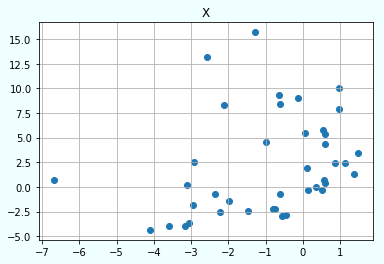

In [18]:
# Plot X

plt.figure(facecolor="azure", edgecolor="coral")
plt.scatter(X[:,0],X[:,1])
plt.title("X")
plt.grid()
plt.show()

In [19]:
# Split the dataset into train and test dtasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [111]:
# Initialize

dt = ScratchDecisionTreeClassifier()

In [112]:
# Fit

dt.fit(X_train,y_train)

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:151: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:151: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:101: RuntimeWarning: invalid value encountered in long_scalars


In [113]:
dt.predict(X_test)

[0, 1, 1, 0, 1, 1, 1, 0]

In [114]:
dt.compute_index_values(X_test, y_test)

accuracy score:  0.25
precision score:  0.2
recall score:  0.3333333333333333
f1 score:  0.2
confusion matrix:
[[1 4]
 [2 1]]


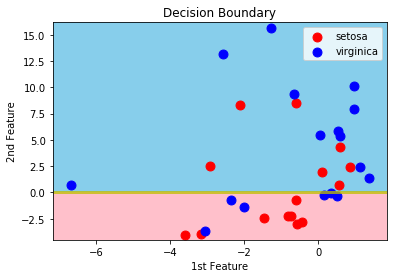

In [115]:
dt.decision_boundary(X_train, y_train)